# Navigator Module Tutorial

### Design Pattern of Library
There are three level of abstraction involved in the design of the library.
- **Application Modules**: The top level module that is used to interact with the library. For example, the parse module, at it's current level of development,  is used to parsed RINEX 3 observation files.
- **Functinal Classes**:  Each module contains a class that is used to perform the desired functionality. For example, the parse module contains the Parse class that user uses.
- **Interface to Functional Classes**:  Each functional class cannot be used without the use of an interface, indicated by "I" in prefix, class. These are plug and play classes that are used to modify the functionality of the functional class. For example, the parse module contains  IParseGPSNav that is used to parse GPS Navigation files. 


## Tutorial of Navigator Module

Here we will go through the basic functionality of the Navigator module. The Navigator module is used to perform the following tasks:
- Parse RINEX 3 Navigation Files
- Extract Satellite Ephemeris from the parsed Navigation Files
- Calculate Satellites Position from the extracted Ephemeris at user specified time
- Plot Satellites Trajetory on a 3D plot

### Tutorial of Parse Module

In [1]:
%load_ext autoreload
%autoreload 2
# How to import a module ?
from navigator.parse import Parser, IParseGPSNav

# User need to import Functional Class as well as the interface for it. For eg, Parser is a functional class and IParseGPSNav is the interface for it.

In [2]:
# Create an object of the fuunctional class
# Along with the object, pass the interface as a parameter to the functional class which will be used to call the methods of the functional class
parser = Parser(
    iparser=IParseGPSNav()
)


In [3]:
# How to work with the functional class ?
# Call it like a function. It's __call__ method will be called which is designed for it's main functionality.

# In this case, the filepath is passed as a parameter to the functional class
# User can see the return type and arguments of the __call__ method

metadata, data = parser(filepath="../../tests/parse/rinexsamples/YELL00CAN_R_20231841500_01H_MN.rnx") # This is how the functional class is called. 
# This will parse the file and return the metadata and data of the file in Pandas DataFrame format

How does the data look?

In [4]:
# Here is the data returned by the functional class
data.head(5)
# THe data is in Pandas DataFrame format which is easy to work with. The Index are TOC and PRN 

SVclockBias  SVclockDrift  SVclockDriftRate  IODE  \
time                sv                                                       
2023-07-03 13:59:44 G15     0.000055  3.524292e-12               0.0  38.0   
2023-07-03 14:00:00 G02    -0.000580  3.751666e-12               0.0  25.0   
                    G10    -0.000044 -1.591616e-12               0.0  43.0   
                    G13     0.000542  5.002221e-12               0.0  92.0   
                    G21     0.000153 -3.410605e-13               0.0  86.0   

                               Crs        DeltaN        M0           Cuc  \
time                sv                                                     
2023-07-03 13:59:44 G15  -61.43750  4.705196e-09  2.359840 -3.242865e-06   
2023-07-03 14:00:00 G02   32.93750  4.630907e-09 -2.478495  1.944602e-06   
                    G10 -178.18750  3.826231e-09 -0.946405 -9.434298e-06   
                    G13  -14.21875  4.054455e-09  2.960505 -7.133931e-07   
                    G21   43.84375  4.694124e-09 -2.980530  2.508983e-06   

                         Eccentricity       Cus  ...      OmegaDot  \
time                sv                           ...                 
2023-07-03 13:59:44 G15      0.015038  0.000012  ... -7.696749e-09   
2023-07-03 14:00:00 G02      0.015925 -0.000002  ... -8.191770e-09   
                    G10      0.008579  0.000007  ... -7.829969e-09   
                    G13      0.007117  0.000010  ... -7.470668e-09   
                    G21      0.024657 -0.000002  ... -8.111766e-09   

                                 IDOT  CodesL2  GPSWeek  L2Pflag     SVacc  \
time                sv                                                       
2023-07-03 13:59:44 G15  6.535987e-10      1.0   2269.0      0.0  2.000000   
2023-07-03 14:00:00 G02  1.178621e-10      1.0   2269.0      0.0  2.000000   
                    G10 -3.935878e-10      1.0   2269.0      0.0  2.000000   
                    G13  8.007476e-10      1.0   2269.0      0.0  2.000000   
                    G21  7.428881e-11      1.0   2269.0      0.0  2.828427   

                         health           TGD  IODC  TransTime  
time                sv                                          
2023-07-03 13:59:44 G15     0.0 -1.071021e-08  38.0   129672.0  
2023-07-03 14:00:00 G02     0.0 -1.769513e-08  25.0   129668.0  
                    G10     0.0  2.328306e-09  43.0   129669.0  
                    G13     0.0 -1.117587e-08  92.0   129670.0  
                    G21     0.0 -1.024455e-08  86.0   129675.0  

[5 rows x 28 columns]

<Axes: title={'center': 'Eccentricity'}, xlabel='time,sv'>

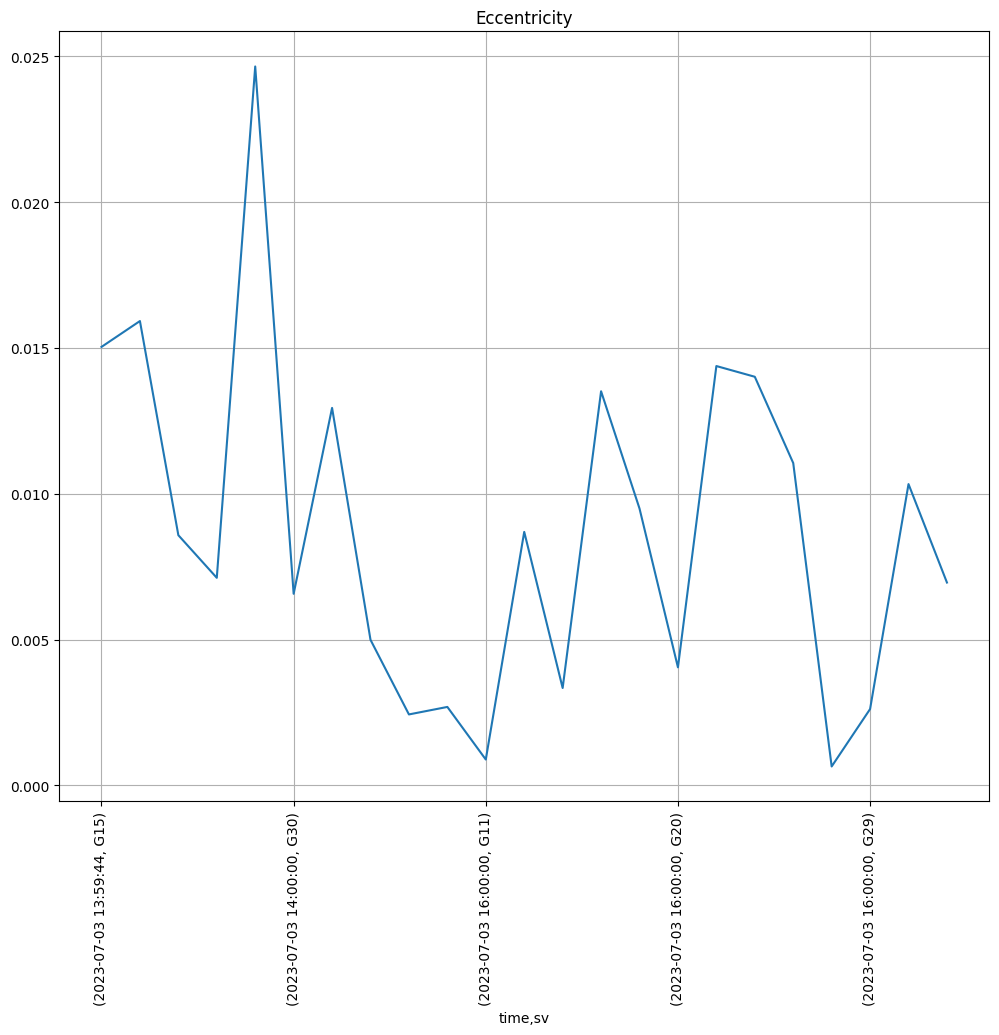

In [5]:
# This data can be plotted and visualized using matplotlib or any other library
# For eg, here is a plot of the data
%matplotlib inline
import matplotlib.pyplot as plt

data['Eccentricity'].plot(ax=plt.gca(), title="Eccentricity", rot=90, figsize=(12, 10), grid=True)


### Tutorial of SatLib and Satellite Class in Satellites Module

In [6]:
# Import the functional satellite and GPS Interface
from navigator.satlib import  Satellite, IGPSEphemeris


# Create an object of the functional class
satellite = Satellite(
    iephemeris=IGPSEphemeris()
)

In [7]:
# see what satellite contains
satellite
# It prints the __repr__ method of the functional class with informs user about the components of the functional class

Satellite(iephemeris = IGPSEphemeris(GPS))

In [8]:
# This class __call__ method takes the metadata and data of the file as parameters along with the time for which the satellite position is to be calculated
# Let's see a resanobale time to interogate the satellite position
data.index

MultiIndex([('2023-07-03 13:59:44', 'G15'),
            ('2023-07-03 14:00:00', 'G02'),
            ('2023-07-03 14:00:00', 'G10'),
            ('2023-07-03 14:00:00', 'G13'),
            ('2023-07-03 14:00:00', 'G21'),
            ('2023-07-03 14:00:00', 'G30'),
            ('2023-07-03 16:00:00', 'G01'),
            ('2023-07-03 16:00:00', 'G03'),
            ('2023-07-03 16:00:00', 'G04'),
            ('2023-07-03 16:00:00', 'G06'),
            ('2023-07-03 16:00:00', 'G11'),
            ('2023-07-03 16:00:00', 'G12'),
            ('2023-07-03 16:00:00', 'G14'),
            ('2023-07-03 16:00:00', 'G17'),
            ('2023-07-03 16:00:00', 'G19'),
            ('2023-07-03 16:00:00', 'G20'),
            ('2023-07-03 16:00:00', 'G22'),
            ('2023-07-03 16:00:00', 'G24'),
            ('2023-07-03 16:00:00', 'G25'),
            ('2023-07-03 16:00:00', 'G28'),
            ('2023-07-03 16:00:00', 'G29'),
            ('2023-07-03 16:00:00', 'G31'),
            ('2023-07-03 16:00:0

In [9]:
# Let's take the Satellites at 2023-06-07  16:00:00 TOC (Time of Clock) to interpolate the satellite position to 19:00:00 GPS time
final_time = "2023-07-03 19:00:00"

# Filter the satellites that has 16:00:00 TOC.
hr_16_data = data[data.index.get_level_values(0) == "2023-07-03 16:00:00"]

In [10]:
# Let's see the position of the satellites at 19:00:00 GPS time

position = satellite(
    t_sv=final_time,
    metadata=metadata,
    data=hr_16_data
)

In [11]:
# Voila! We have the position of the satellites at 19:00:00 GPS time
position

x                y                z
time                sv                                                    
2023-07-03 16:00:00 G01   2706810.115043   14486913.07077 -22432505.784817
                    G03  10761951.320628  21873381.881135 -10825901.692891
                    G04   1529146.019748  23265853.191742  12623149.644185
                    G06  26075412.682117  -5133047.775012  -1352447.539042
                    G11   19409344.59538 -12743812.725834   12864230.66612
                    G12  -6357964.441002 -22238068.925223  -13401750.93418
                    G14  21169611.050578  10070633.526648 -12618144.561152
                    G17  15638410.602955  -1223079.106627 -21025863.101999
                    G19  17136556.400051  -8330972.070632 -18583744.807832
                    G20  12326730.154368  -9891060.506765  21359534.752962
                    G22  -16701799.47487  12425178.019968 -15950389.479121
                    G24   1298300.518386 -16748241.260599  -20858587.26519
                    G25 -16946909.852614 -20454932.080478  -3062707.623974
                    G28 -25908196.205306   4725996.221428  -3457714.641114
                    G29  -6479496.301305 -17964888.223147   18364152.86911
                    G31 -23303078.992888  10633453.278413   7630026.647835
                    G32 -16085345.922474   4078352.413303 -20513442.482114

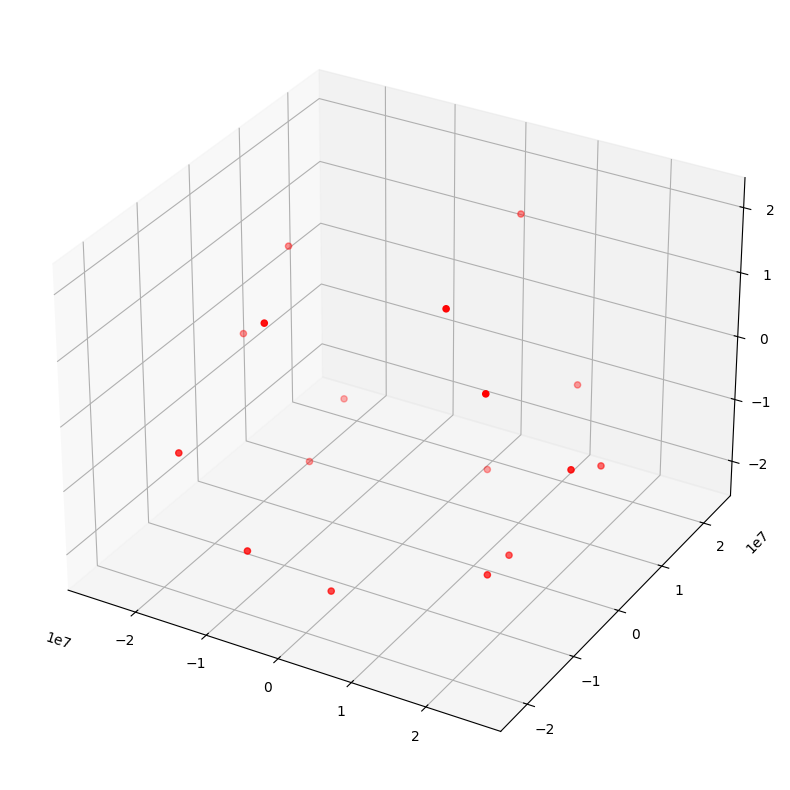

In [12]:
# Let's plot the position of the satellites in 3D
# Use %matplotlib qt to plot in interactive mode in a new window. Requires Qt5 installed
%matplotlib inline 
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(position['x'], position['y'], position['z'], c='r', marker='o')


Cool! But I promised trajectory plots. How do I do that?

In [13]:
# Simple Use the trajectory method from the functional class to get the interpolated position of the satellites at any time
# Let's see the trajectory of the satellites from 16:00:00 to 19:00:00 GPS time

trajectory = satellite.trajectory(
    t_sv = "2023-07-03 16:00:00", # Start time
    metadata=metadata,
    data=data,
    interval=60 * 60 * 3, # 3 hours interval
    step= 20, # Every 20 seconds resolution
)

In [14]:
# Shape of the returned trajectory data is (number of satellites, 3 coordinates, number of points in the trajectory)
# In this case, it is (23, 3, 540) which means 23 satellites, 3 coordinates (x, y, z) and 540 points in the trajectory
trajectory.shape

(23, 3, 540)

Now let's plot the trajectory of the satellite on a 3D plot.

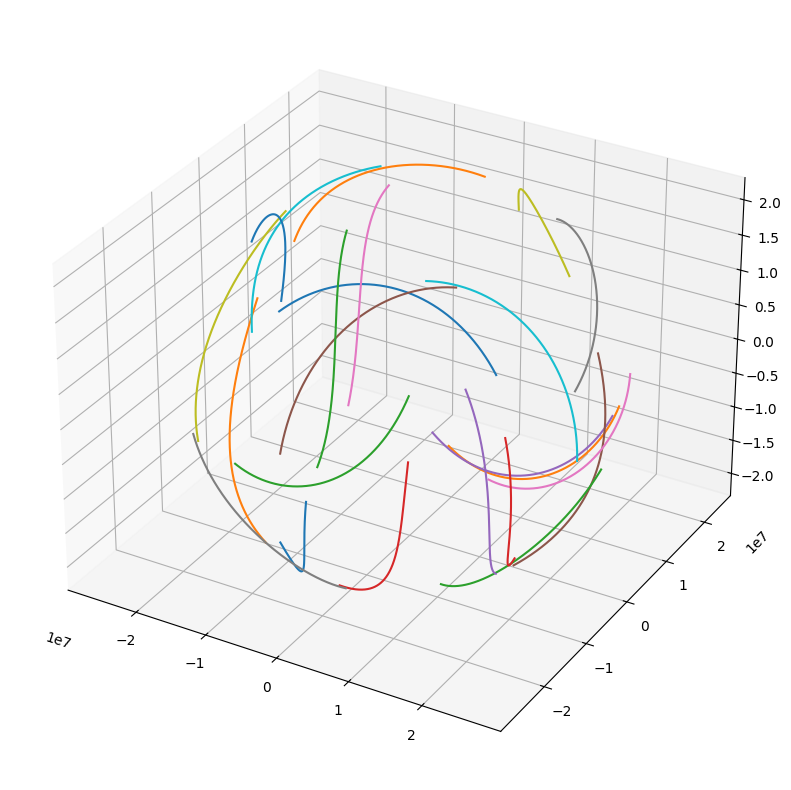

In [15]:
# Let's plot the trajectory of the satellites in 3D
%matplotlib inline
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

for i in range(trajectory.shape[0]):  # For each satellite
    ax.plot(trajectory[i][0], trajectory[i][1], trajectory[i][2]) # Plot the trajectory 

### Development of the Navigator Module
Additional modules and various classes are still in development. 
Interested in contributing? contact me at: [email](mailto:nbhattarai@crimson.ua.edu)
Thanks for following along!